In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [137]:
df = pd.read_csv("BlackFriday.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [5]:
del df["Product_Category_2"]
del df["Product_Category_3"]

In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [7]:
df["User_ID"].nunique()

5891

In [8]:
df.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Purchase                      17959
dtype: int64

In [9]:
df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [10]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
df["Occupation"].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [12]:
df["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [13]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [14]:
df["Marital_Status"].unique()

array([0, 1], dtype=int64)

In [15]:
df["Product_Category_1"].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [16]:
df["Purchase"].sum()

5017668378

In [17]:
for column in df.columns:
    print(column, "->", df[column].nunique())

User_ID -> 5891
Product_ID -> 3623
Gender -> 2
Age -> 7
Occupation -> 21
City_Category -> 3
Stay_In_Current_City_Years -> 5
Marital_Status -> 2
Product_Category_1 -> 18
Purchase -> 17959


In [18]:
data = pd.DataFrame({'Ratio' : [len(df[df['Gender'] == 'M']), len(df[df['Gender'] == 'F'])]}, index= ['Male', 'Female'])

In [19]:
data

,Ratio
Male,405380
Female,132197


In [1]:
data.plot(kind='pie', y='Ratio', autopct="%.2f", figsize=(1, 1))

plt.ylabel(" ")

NameError: name 'data' is not defined

<Axes: title={'center': 'Gender Ratio'}>

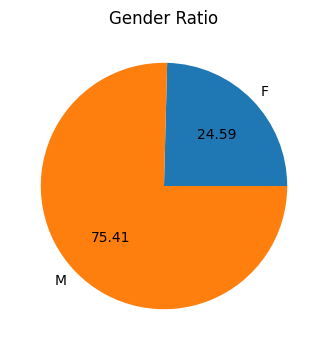

In [21]:
df.groupby('Gender').size().plot(kind = "pie", autopct = "%.2f", figsize = (4, 4), title = "Gender Ratio")

In [22]:
df.groupby("Gender").size()

Gender
F    132197
M    405380
dtype: int64

<Axes: ylabel='Purchase'>

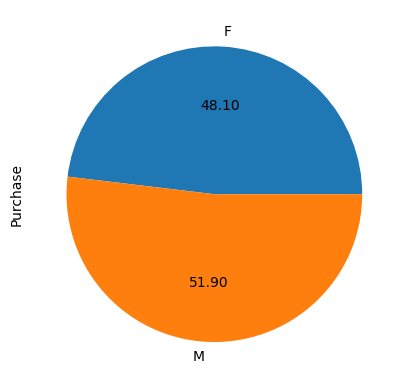

In [24]:
df['Purchase'] = pd.to_numeric(df['Purchase'], errors='coerce')
df.groupby("Gender")['Purchase'].mean().plot(kind='pie', autopct="%.2f")

In [25]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<Axes: title={'center': 'Age Distribution'}, xlabel='Age', ylabel=' purchase count'>

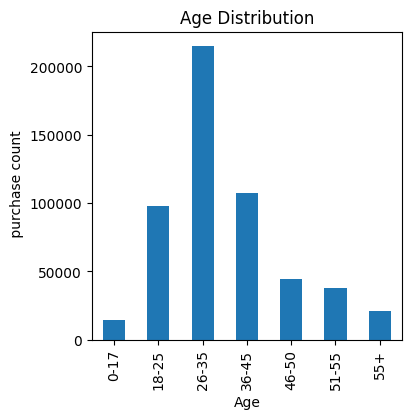

In [26]:
df.groupby("Age").size().plot(kind = "bar", figsize = (4, 4), title =  "Age Distribution", xlabel= "Age", ylabel = " purchase count" )

<Axes: title={'center': 'Age Distribution'}>

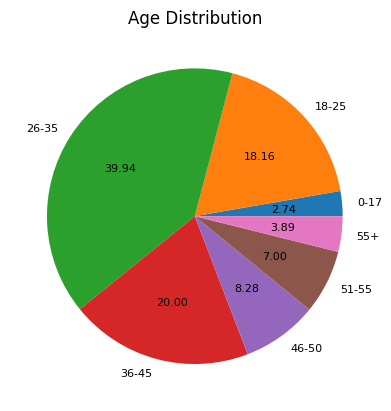

In [27]:
df.groupby("Age").size().plot(kind = "pie", autopct = "%.2f",  title = "Age Distribution", fontsize=8)

In [28]:
lst = []
for i in df["Age"].unique():
    lst.append([i ,df[df['Age'] == i]["Product_ID"].nunique()])

lst
data = pd.DataFrame(lst, columns = ['Age', 'Products'])

C:\Users\js838\AppData\Local\Temp\ipykernel_26040\1451652191.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


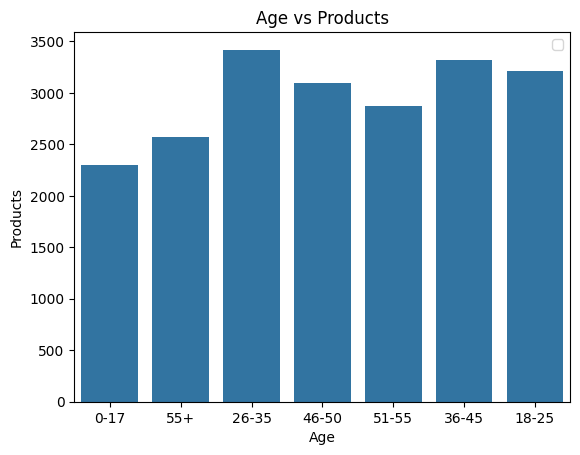

In [29]:
sns.barplot(data = data, x = "Age", y = "Products")
plt.title("Age vs Products")
plt.legend()

In [30]:
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<Axes: xlabel='Age'>

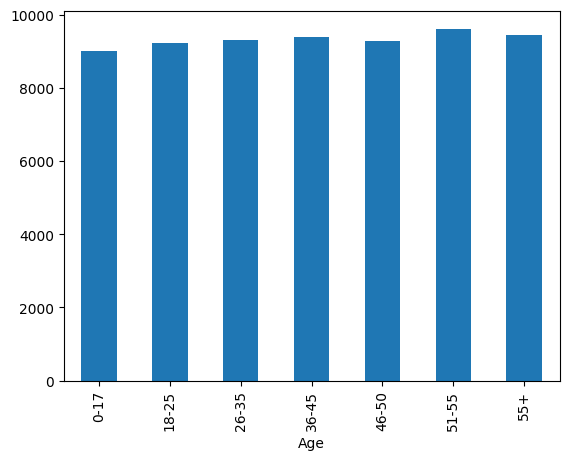

In [32]:
df['Purchase'] = pd.to_numeric(df['Purchase'], errors='coerce')
df.groupby("Age")['Purchase'].mean().plot(kind='bar')

<Axes: >

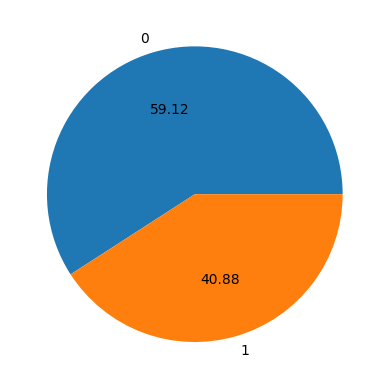

In [33]:
df.groupby("Marital_Status").size().plot(kind = "pie", autopct = "%.2f")

<Axes: >

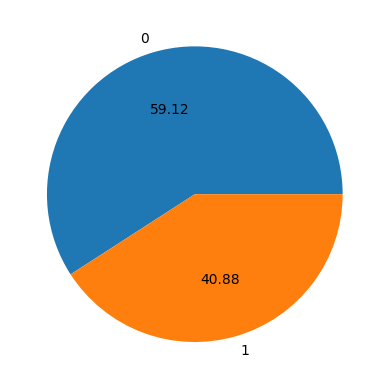

In [34]:
df.groupby("Marital_Status").size().plot(kind = "pie", autopct = "%.2f")

<Axes: xlabel='Age', ylabel='count'>

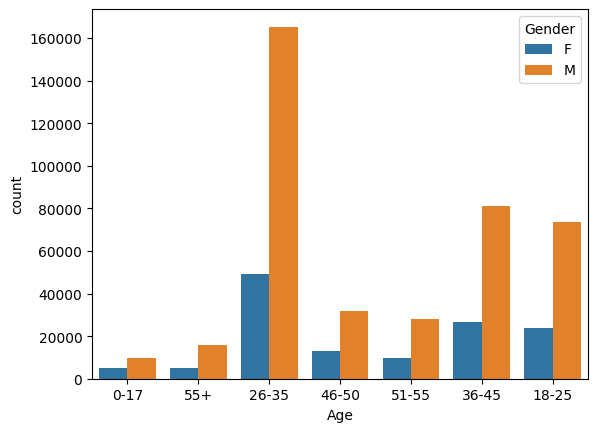

In [35]:
sns.countplot(x = "Age", hue = "Gender", data = df)

<Axes: xlabel='Gender', ylabel='count'>

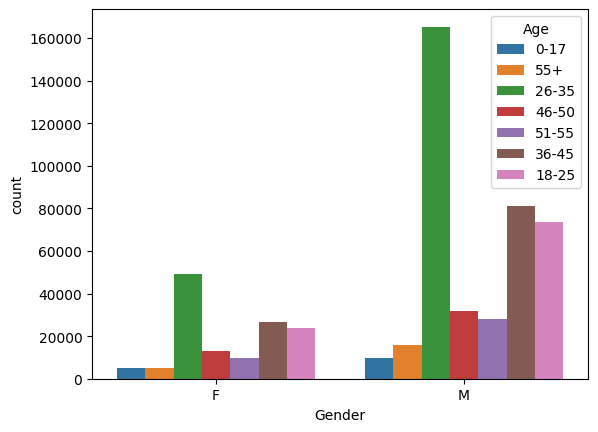

In [36]:
sns.countplot(x = "Gender", hue = "Age", data = df)

<Axes: xlabel='Gender', ylabel='count'>

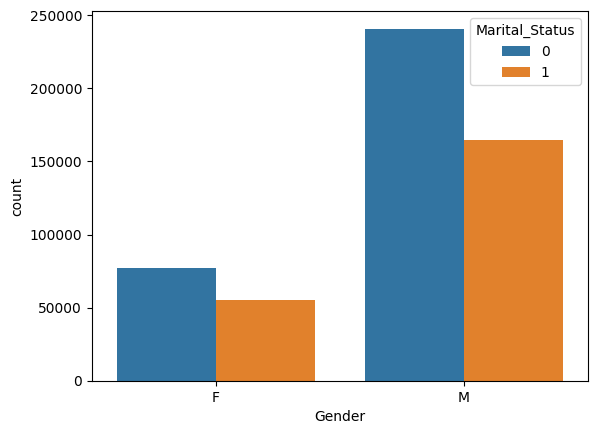

In [37]:
sns.countplot(x = "Gender", hue = "Marital_Status", data = df)

<Axes: xlabel='Marital_Status', ylabel='count'>

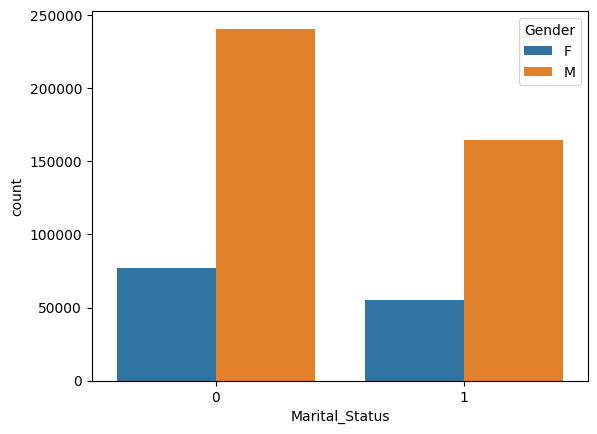

In [38]:
sns.countplot(x = "Marital_Status", hue = "Gender", data = df)

<Axes: xlabel='City_Category', ylabel='count'>

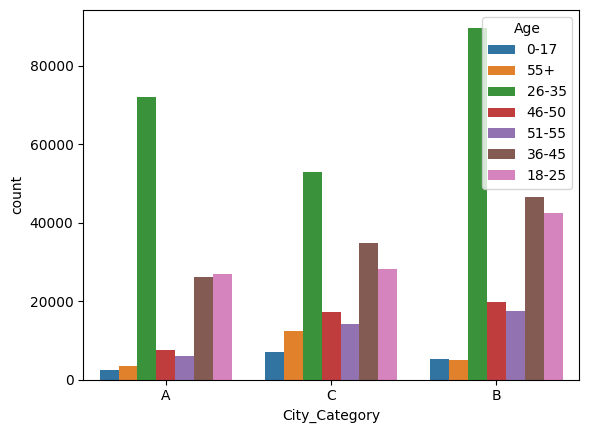

In [39]:
sns.countplot(x = df["City_Category"], hue = df["Age"])

<Axes: >

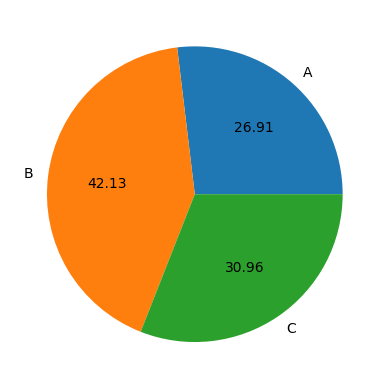

In [40]:
df.groupby('City_Category').size().plot(kind = 'pie', autopct = "%.2f")

<Axes: xlabel='City_Category', ylabel='count'>

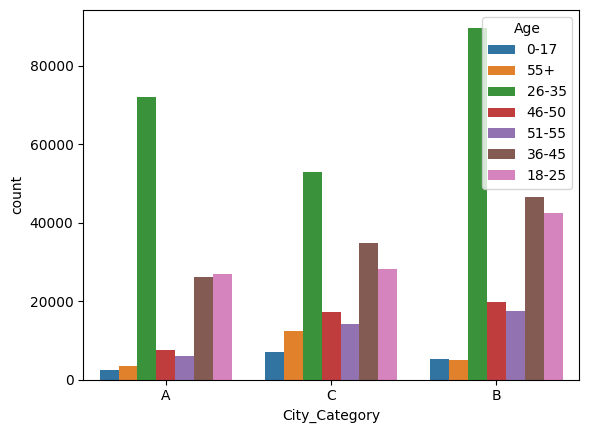

In [41]:
sns.countplot(x = 'City_Category', hue = 'Age', data = df)

<Axes: xlabel='City_Category', ylabel='count'>

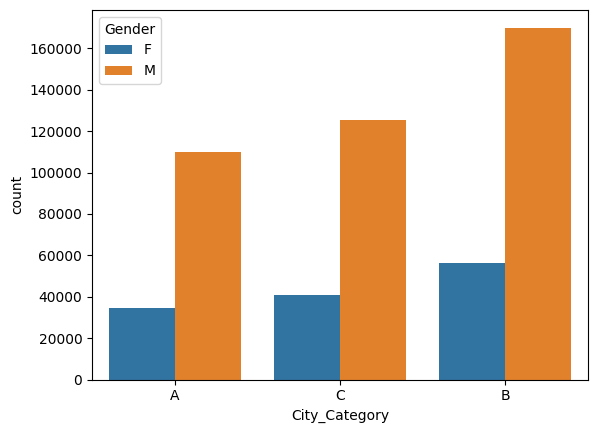

In [42]:
# M0, M1, F0, F1

sns.countplot(x = "City_Category",hue = "Gender", data = df)

In [43]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [47]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

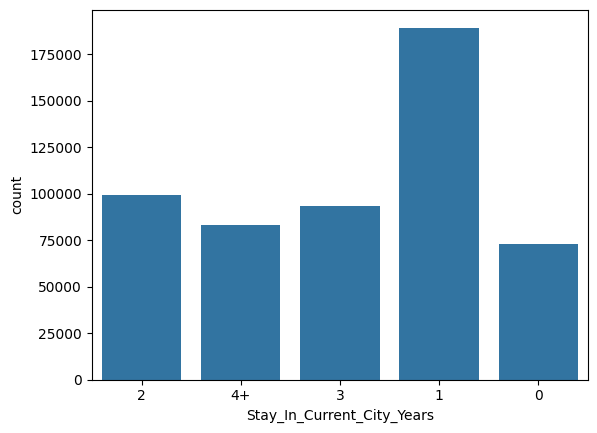

In [50]:
sns.countplot(x = df["Stay_In_Current_City_Years"])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

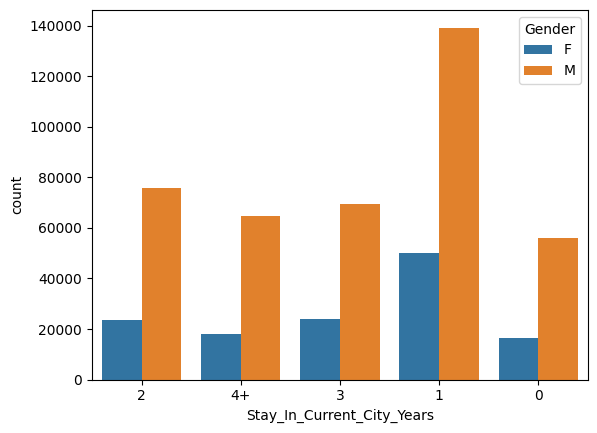

In [52]:
sns.countplot(x = "Stay_In_Current_City_Years", hue = "Gender", data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

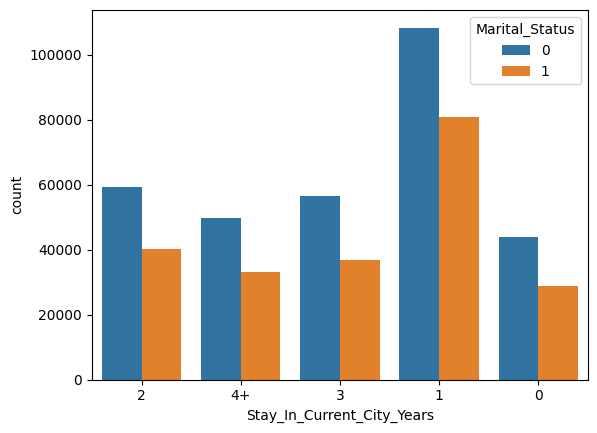

In [54]:
sns.countplot(x = "Stay_In_Current_City_Years", hue = "Marital_Status", data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

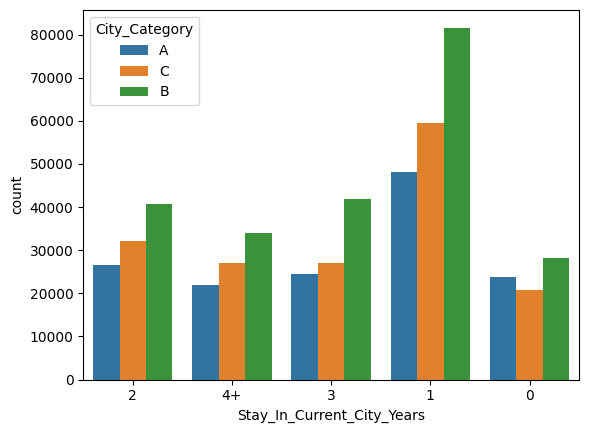

In [55]:
sns.countplot(x = "Stay_In_Current_City_Years", hue = "City_Category", data = df)

<Axes: xlabel='City_Category', ylabel='count'>

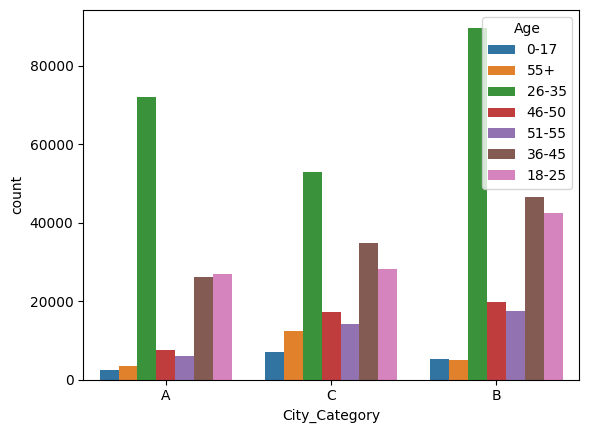

In [57]:
sns.countplot(x = "City_Category", hue = "Age" ,data = df)

<Axes: >

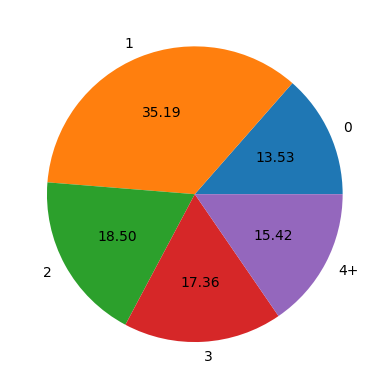

In [62]:
df.groupby("Stay_In_Current_City_Years").size().plot(kind = "pie", autopct = "%.2f")

In [64]:
df['Purchase'] = pd.to_numeric(df['Purchase'], errors='coerce')
df.groupby("Age")['Purchase'].mean().plot(kind='bar')

TypeError: 'function' object is not subscriptable

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         0 non-null       float64
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Purchase                    537577 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 41.0+ MB


In [95]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                           537577
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Purchase                           0
dtype: int64

<Axes: xlabel='Occupation', ylabel='count'>

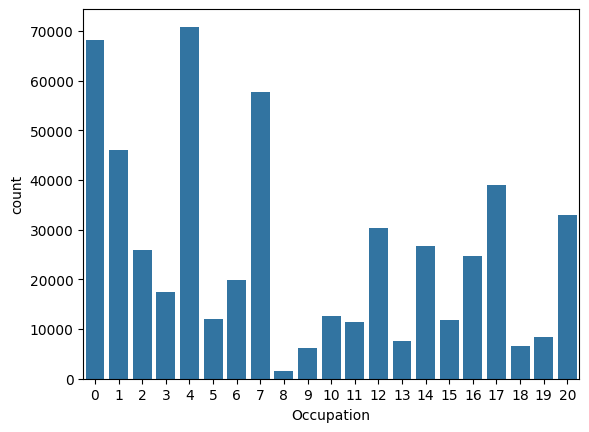

In [65]:
sns.countplot(x = df["Occupation"])

<Axes: xlabel='Occupation'>

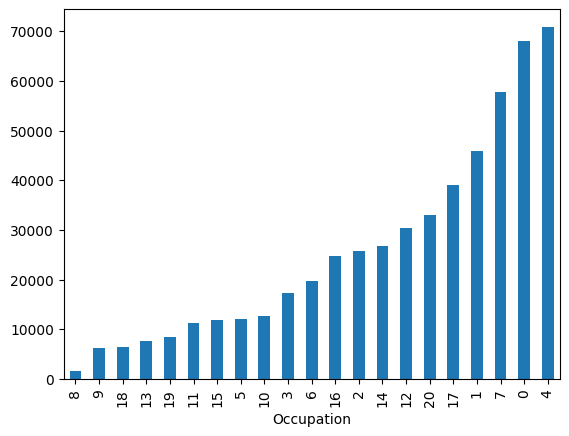

In [67]:
df.groupby('Occupation').size().sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

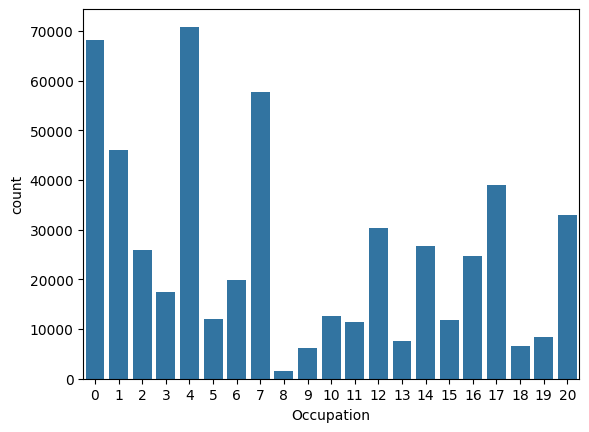

In [79]:
numeric_data = df.select_dtypes(include=['number'])

# Group by 'Occupation' and calculate the mean for numeric columns
grouped_data = numeric_data.groupby(df['Occupation']).mean()

# Sort the data based on the mean of a particular column (e.g., the first column)
sorted_data = grouped_data.sort_values(by=grouped_data.columns[0])

# Plot the sorted data
sns.countplot(x = "Occupation", data = df)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


<Axes: xlabel='Occupation'>

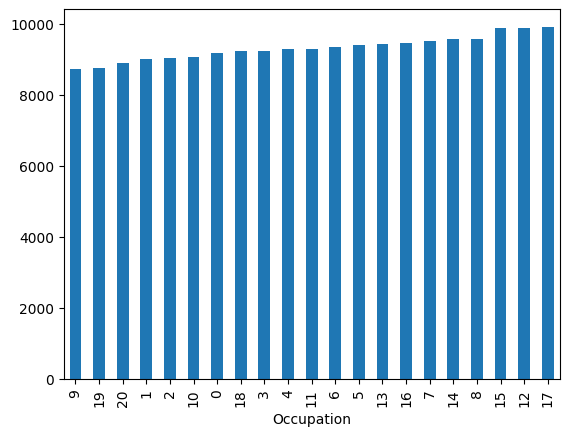

In [106]:
df['Purchase'] = pd.to_numeric(df['Purchase'], errors='coerce')
# Group by 'Occupation', calculate the mean for 'Purchase', sort, and plot
df.groupby('Occupation')['Purchase'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='Occupation', ylabel='count'>

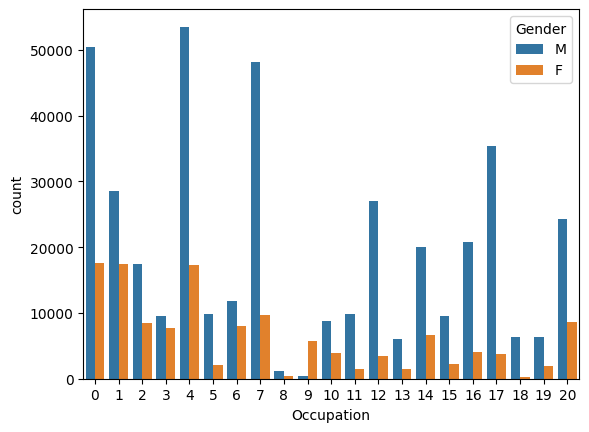

In [108]:
sns.countplot(x = 'Occupation', hue = 'Gender', data = df)

<Axes: xlabel='Occupation'>

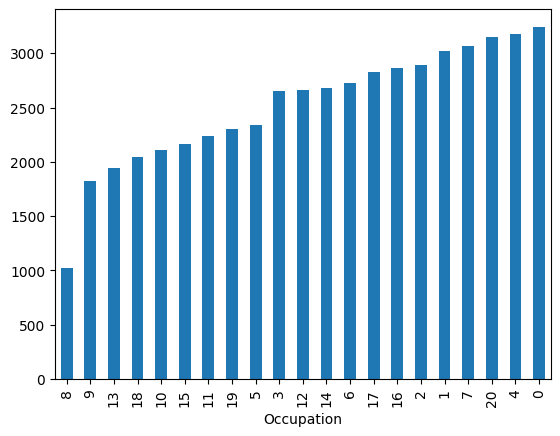

In [114]:
df.groupby('Occupation')['Product_ID'].nunique().sort_values().plot(kind = 'bar')

AttributeError: Rectangle.set() got an unexpected keyword argument 'kwargs'

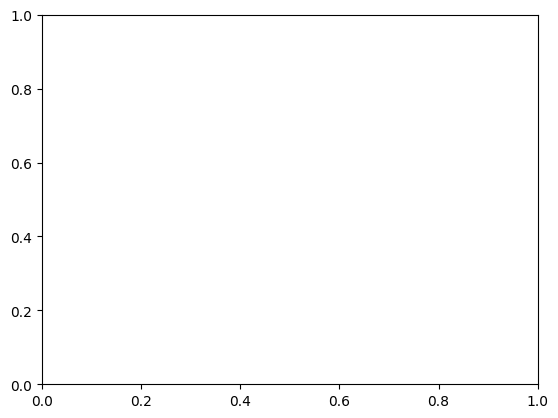

In [121]:
df.groupby("Product_Category_1").size().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

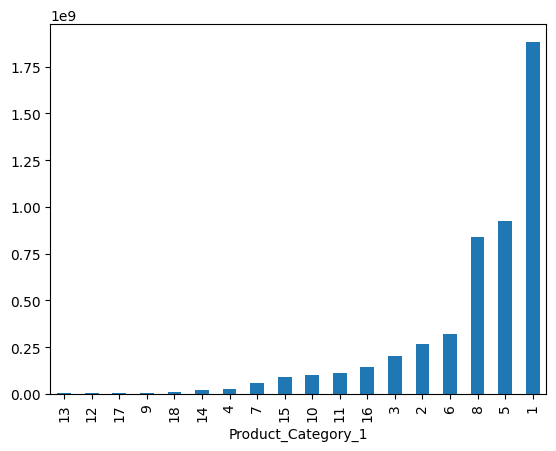

In [122]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_ID'>

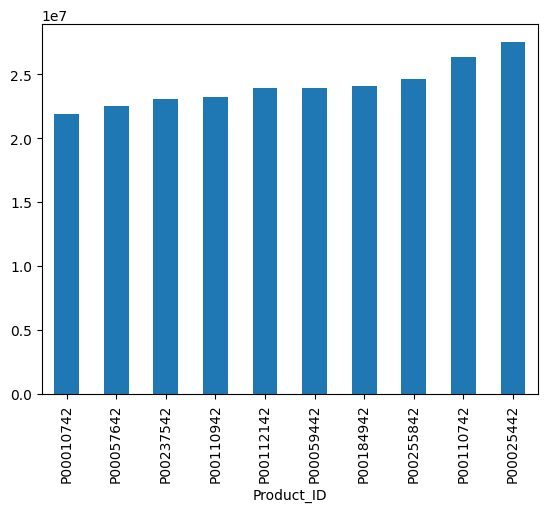

In [125]:
df.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1', ylabel='count'>

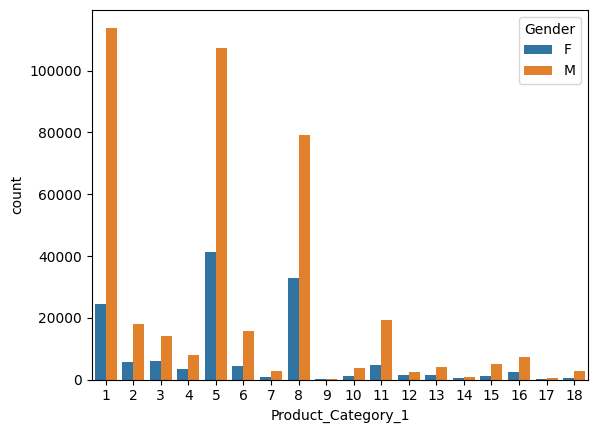

In [126]:
sns.countplot(x = 'Product_Category_1', hue = 'Gender', data = df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

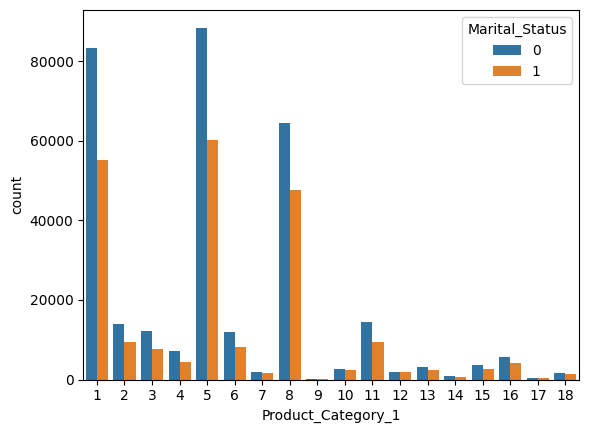

In [127]:
sns.countplot(x = 'Product_Category_1', hue = 'Marital_Status', data = df)

In [139]:
lst = []

for i in range(len(df)):
    lst.append(df['Gender'][i] + "_" + str(df['Marital_Status'][i]))

df['MaritalGender'] = lst

In [140]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,M_0


<Axes: xlabel='MaritalGender', ylabel='count'>

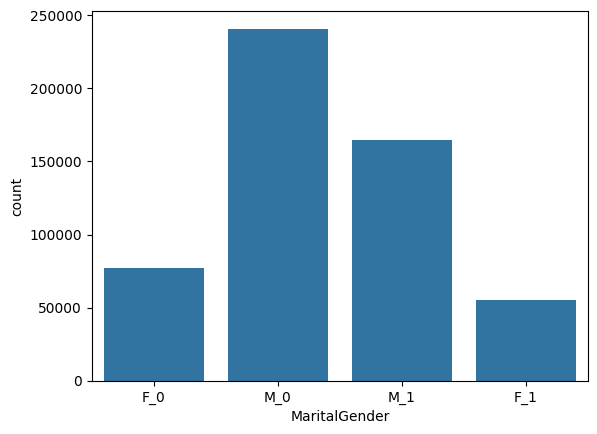

In [141]:
sns.countplot(x = df["MaritalGender"])

<Axes: xlabel='Age', ylabel='count'>

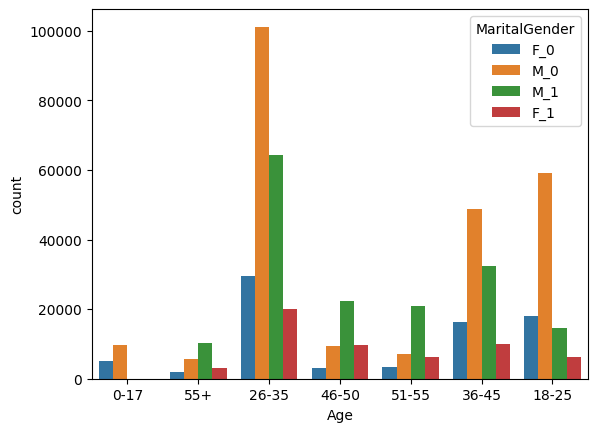

In [142]:
sns.countplot(x = df['Age'], hue = df['MaritalGender'])

<Axes: xlabel='Product_Category_1', ylabel='count'>

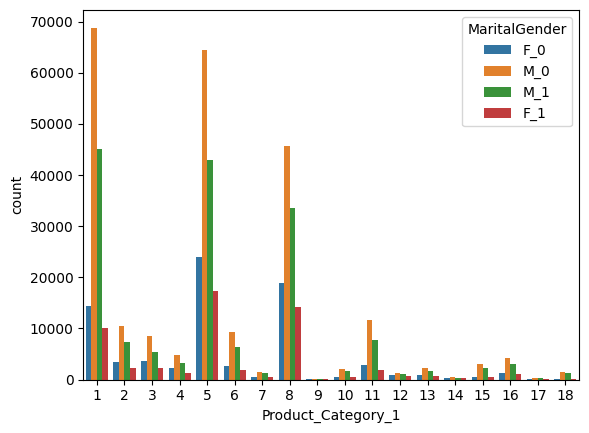

In [143]:
sns.countplot(x = df['Product_Category_1'], hue = df["MaritalGender"])

<Axes: xlabel='City_Category', ylabel='count'>

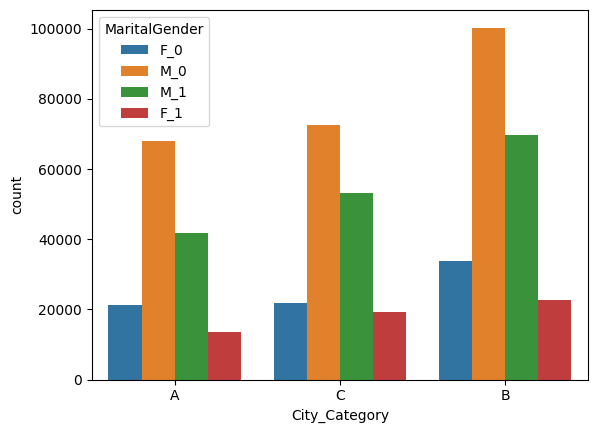

In [145]:
sns.countplot(x = df['City_Category'], hue = df['MaritalGender'])

<Axes: xlabel='Age', ylabel='count'>

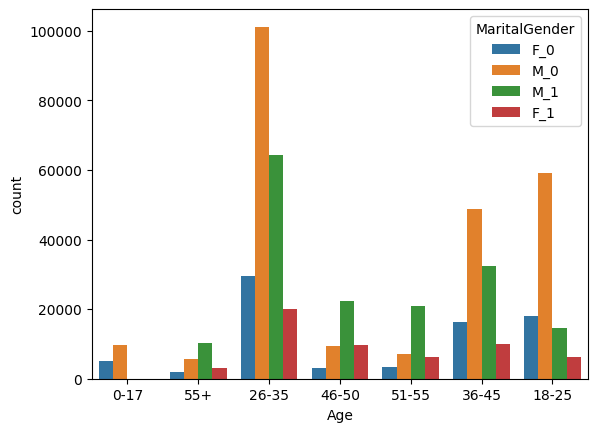

In [147]:
sns.countplot(x = df['Age'], hue = df['MaritalGender'])

<Axes: xlabel='Product_Category_1', ylabel='count'>

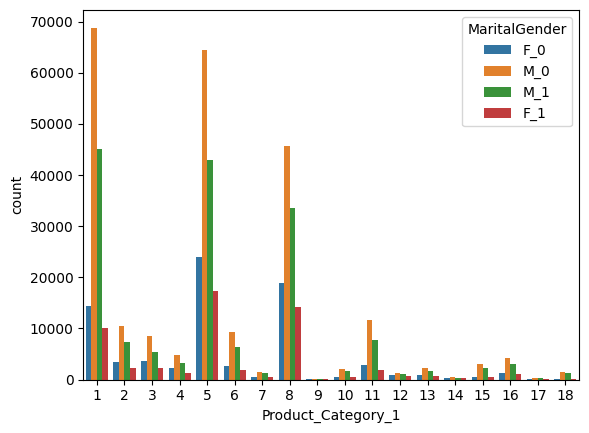

In [149]:
sns.countplot(x = df['Product_Category_1'], hue = df['MaritalGender'])

In [41]:
len(df[df['Age'] == "26-35"])

214690

In [50]:
df[df["Age"] == i]["Product_ID"].nunique()

18-25


In [22]:
# Managing active orders using a set and prioritizing them using quick sort

# Set to store active orders (unique order IDs)
active_orders = set()

# List to store orders with their priority levels
order_list = []

# Function to add an order
def add_order(order_id, priority):
    if order_id not in active_orders:
        active_orders.add(order_id)
        order_list.append({'order_id': order_id, 'priority': priority})
        print(f"Order {order_id} added with priority {priority}.")
    else:
        print(f"Order {order_id} is already active.")

# Function to remove an order
def remove_order(order_id):
    if order_id in active_orders:
        active_orders.remove(order_id)
        # Remove the order from the order list as well
        global order_list
        order_list = [order for order in order_list if order['order_id'] != order_id]
        print(f"Order {order_id} completed and removed.")
    else:
        print(f"Order {order_id} not found among active orders.")

# Quick sort implementation for prioritizing orders
def quick_sort_orders(orders):
    if len(orders) <= 1:
        return orders
    pivot = orders[0]
    less_than_pivot = [order for order in orders[1:] if order['priority'] <= pivot['priority']]
    greater_than_pivot = [order for order in orders[1:] if order['priority'] > pivot['priority']]
    return quick_sort_orders(less_than_pivot) + [pivot] + quick_sort_orders(greater_than_pivot)

# Function to get sorted orders by priority
def get_sorted_orders():
    sorted_orders = quick_sort_orders(order_list)
    print("\nSorted Orders by Priority:")
    for order in sorted_orders:
        print(f"Order ID: {order['order_id']}, Priority: {order['priority']}")
    return sorted_orders

# Example usage
add_order(101, 2)
add_order(102, 5)
add_order(103, 1)
add_order(104, 3)

# Display sorted orders
get_sorted_orders()

# Remove an order
remove_order(102)

# Display sorted orders again after removal
get_sorted_orders()

Order 101 added with priority 2.
Order 102 added with priority 5.
Order 103 added with priority 1.
Order 104 added with priority 3.

Sorted Orders by Priority:
Order ID: 103, Priority: 1
Order ID: 101, Priority: 2
Order ID: 104, Priority: 3
Order ID: 102, Priority: 5
Order 102 completed and removed.

Sorted Orders by Priority:
Order ID: 103, Priority: 1
Order ID: 101, Priority: 2
Order ID: 104, Priority: 3


[{'order_id': 103, 'priority': 1},
 {'order_id': 101, 'priority': 2},
 {'order_id': 104, 'priority': 3}]